**Analiza największych w świacie firm**

---
*autor: Radzivon Shkabara*

Dla projekta została wybrana baza danych Forbse(rok 2004) składająca się z 2000 największych w świacie firm i uzupełnione danymi dotyczące nazw skrótowych, lokalizacji, kategorii, sprzedaży, zysku brutto, aktywami i kapitalizacji.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy

# Pobieranie bazy danych ze źródła

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/Forbes2000.csv', delimiter = ',' )
df.describe(include='all')

,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,1995.000000,2000.000000,2000.000000
unique,NaN,NaN,2000,61,27,NaN,NaN,NaN,NaN
top,NaN,NaN,Citigroup,United States,Banking,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,751,313,NaN,NaN,NaN,NaN
mean,1000.500000,1000.500000,NaN,NaN,NaN,9.697010,0.381133,34.041850,11.877655
std,577.494589,577.494589,NaN,NaN,NaN,18.002592,1.765454,99.678786,24.460197
min,1.000000,1.000000,NaN,NaN,NaN,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,500.750000,NaN,NaN,NaN,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,1000.500000,NaN,NaN,NaN,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,1500.250000,NaN,NaN,NaN,9.547500,0.440000,22.792500,10.602500


# Wyświetlenie otrzymanej tabeli

In [3]:
df.head()

,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
0,1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


*Zastosowanie funkcji do wykreślenia dwóch wykresów przedstawiających korelacje między zmiennymi 1) kapitalizacją i miejscem w rankingu 2) liczba sprzedaży do krajów, które je wytworzyły*

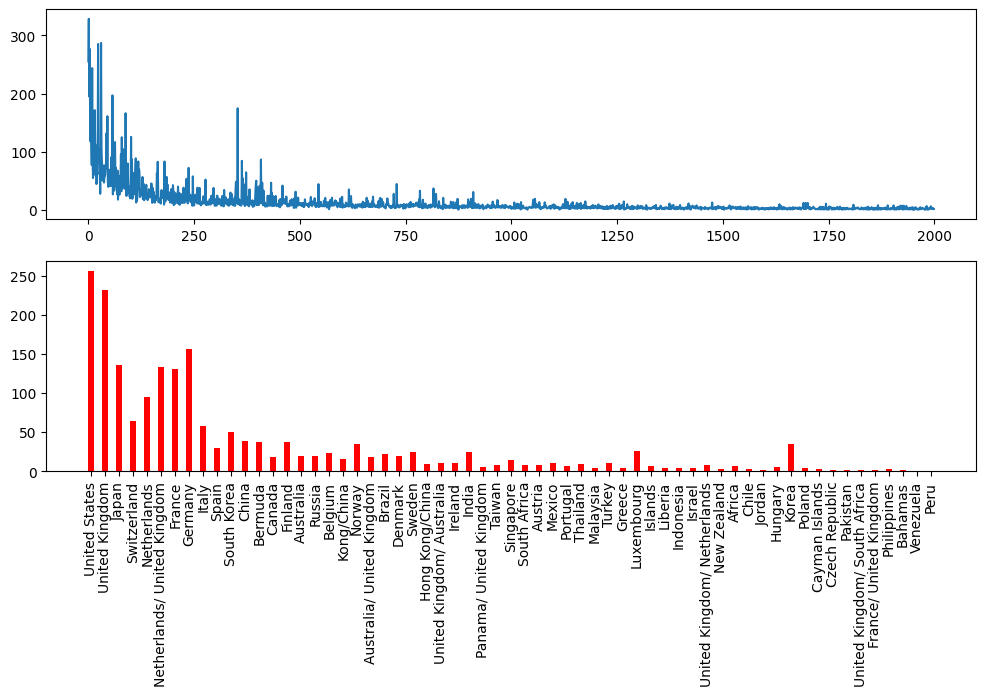

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(df.marketvalue)
plt.subplot(212)
plt.bar(df.country, df.sales, width=0.4, color='red')
plt.xticks(rotation=90)
plt.show()

1.   Z pierwszego wykresu jasno wynika, że kapitalizacja zmienia się dość radykalnie i zdecydowana większość firm o wartości ponad 100 miliardów dolarów znajduje się w pierwszej 500;
2.   Z drugiego wykresu wynika, że cztery kraje o największej liczbie sprzedaży to USA, Wielka Brytania, Niemcy i Japonia. Wykres pokazuje również, że większość krajów o wysokiej sprzedaży znajduje się w Ameryce Północnej i Europie Zachodniej.


**Funkcja gęstości oraz histogram**

*Korelacja sprzedaży i przychodów*

C:\Users\s96792\AppData\Local\Temp\ipykernel_15768\2676518533.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = scipy.stats.kde.gaussian_kde(df.sales)


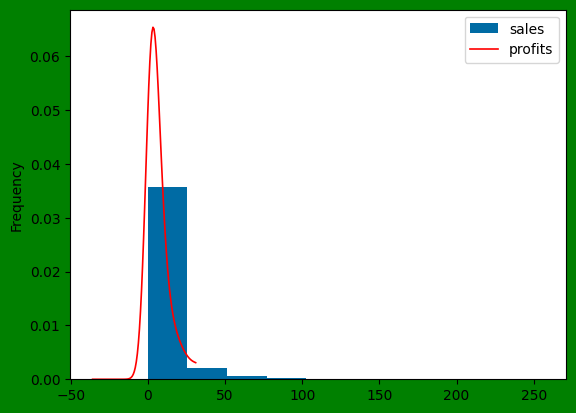

In [5]:
plt.style.use('tableau-colorblind10')
plt.figure(facecolor='green')
df.sales.plot.hist(density=True)
density = scipy.stats.kde.gaussian_kde(df.sales)
x = np.linspace(min(df.profits)-10, max(df.profits)+10, 100)
plt.plot(x, density(x), color='red', linewidth=1.2, label='profits')
plt.legend()
plt.show()

**Wizualne przedstawienie zależności między zmiennymi**

<Figure size 640x480 with 0 Axes>

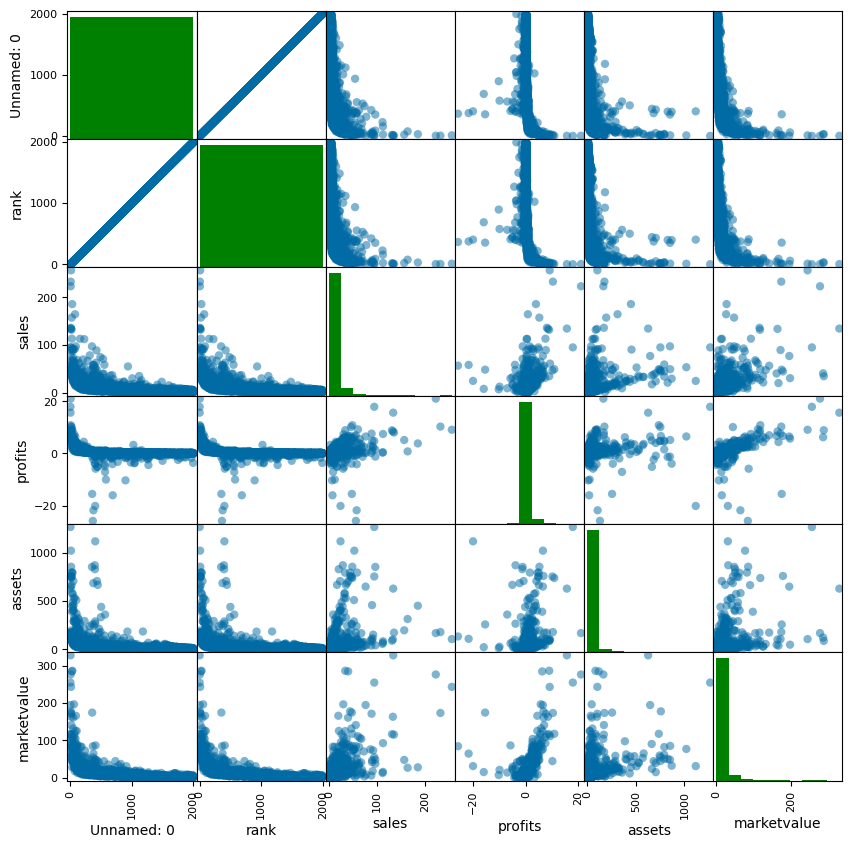

In [6]:
plt.figure(facecolor='white')
pd.plotting.scatter_matrix(df, marker='0', figsize=(10,10), diagonal='hist',
                            hist_kwds={'bins':10,
                                       'color':'green'})
plt.show()

In [7]:
df.describe()

,Unnamed: 0,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,2000.000000,256.330000,20.960000,1264.030000,328.540000


# Testy

In [8]:
st.kurtosis(df.sales)

55.918412161751974

In [9]:
st.skew(df.sales)

6.164282557386029

st.shapiro(df.sales)

In [11]:
st.anderson(df.sales, dist='norm')

AndersonResult(statistic=297.7656685830284, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.69701, scale=18.002592352925532)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

---


***Dziękuję za uwagę***